In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [45]:
n_samples = 1000
n_features = 4
centers = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1]])
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=0.3, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

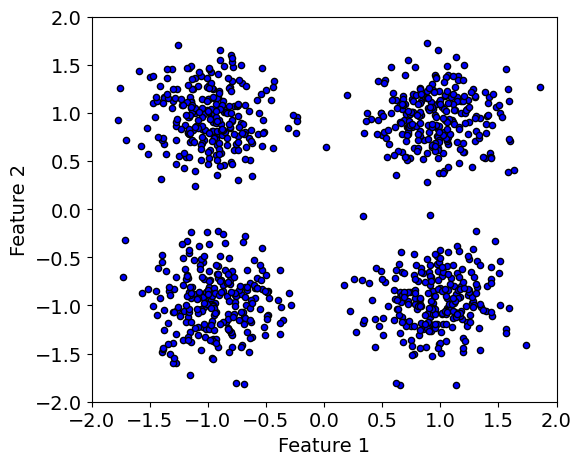

In [46]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=20, c='b', edgecolors='k')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


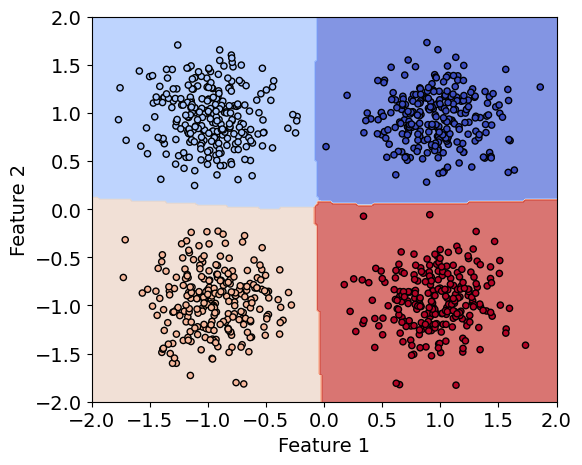

In [48]:
# Create a meshgrid
h = 0.02 # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Set the limits of the x-axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Set the limits of the y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Create a meshgrid

# Plot the decision boundary
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]) # Make predictions
Z = Z.reshape(xx.shape) # Reshape the predictions
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm) # Plot the predictions
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()